<a href="https://colab.research.google.com/github/ArtuRUA01/California-House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data

In [ ]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d camnugent/california-housing-prices  -p /content
!unzip california-housing-prices.zip
!cd ~/.kaggle

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 60.3MB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             


# Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [ ]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 20640
Columns: 10


In [ ]:
print(f'Columns name: {df.columns.to_list()}')

Columns name: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']




*   longitude - довгота
*   latitude - широта
*   housing_median_age - вік будинка
*   total_rooms - кількість кімнат в кварталі
*   total_bedrooms - кількість спалень в кварталі
*   population - кількість людей, що проживають в кварталі
*   households - кількість людей, що проживають в будинку
*   median_income - середній дохід людей, що проживають в кварталі (вимірюється десятками тисяч доларів США)
*   median_house_value - середня вартість будинка
*   ocean_proximity - близькість океану





# Data processing

Загальна статистика даних

In [ ]:
df.describe().T

count           mean  ...           75%          max
longitude           20640.0    -119.569704  ...    -118.01000    -114.3100
latitude            20640.0      35.631861  ...      37.71000      41.9500
housing_median_age  20640.0      28.639486  ...      37.00000      52.0000
total_rooms         20640.0    2635.763081  ...    3148.00000   39320.0000
total_bedrooms      20433.0     537.870553  ...     647.00000    6445.0000
population          20640.0    1425.476744  ...    1725.00000   35682.0000
households          20640.0     499.539680  ...     605.00000    6082.0000
median_income       20640.0       3.870671  ...       4.74325      15.0001
median_house_value  20640.0  206855.816909  ...  264725.00000  500001.0000

[9 rows x 8 columns]

Тип даних

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa2b19dd0>,
      dtype=object)

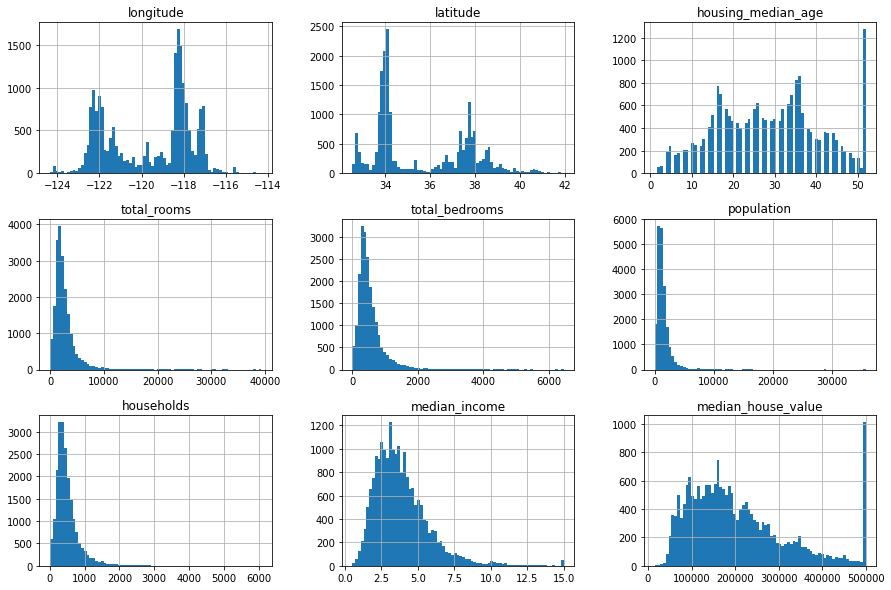

In [ ]:
df.hist(bins = 75, figsize=(15, 10)) 

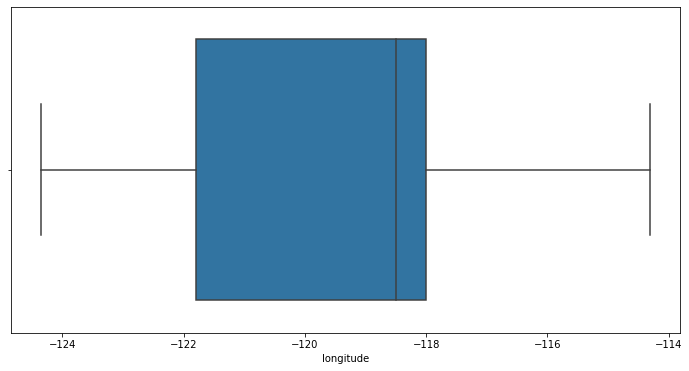

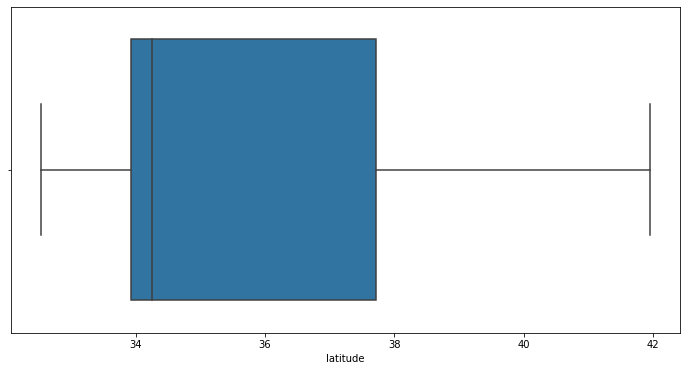

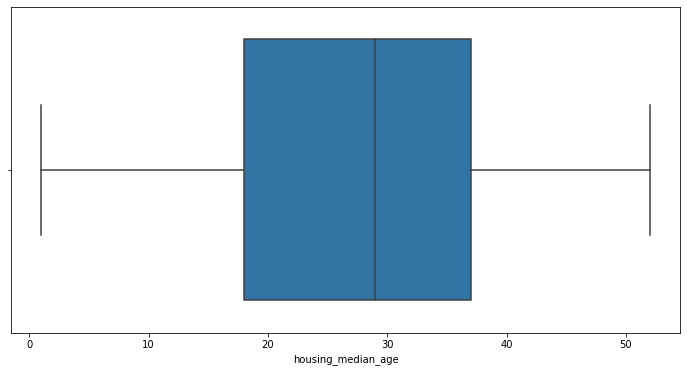

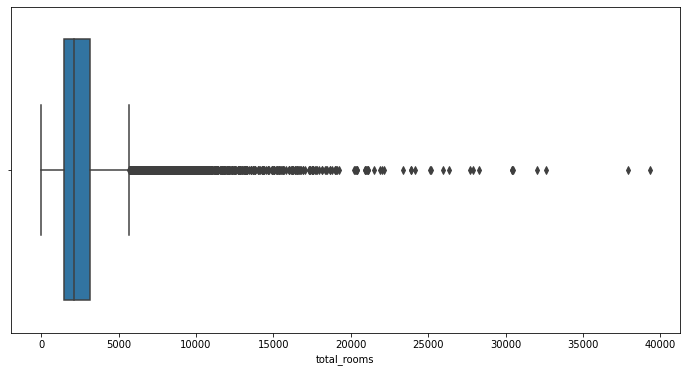

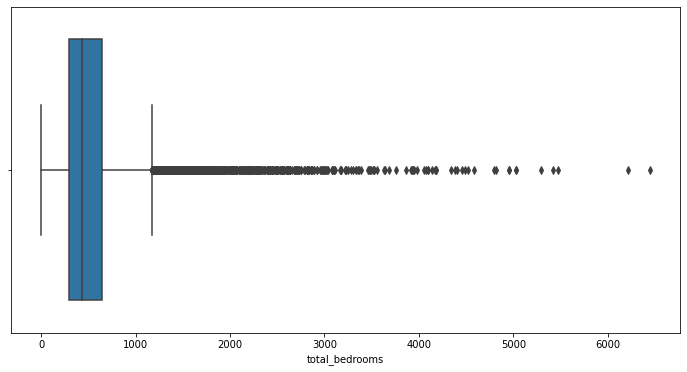

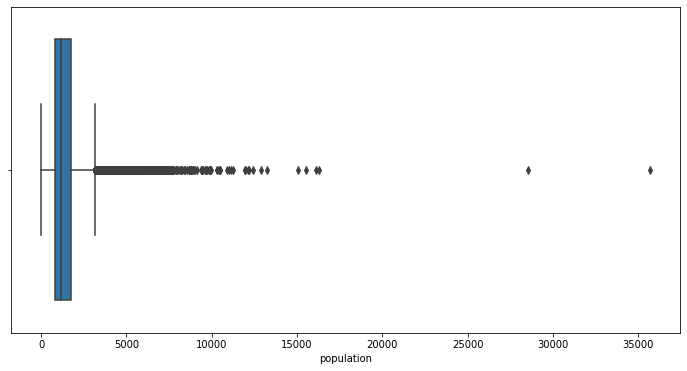

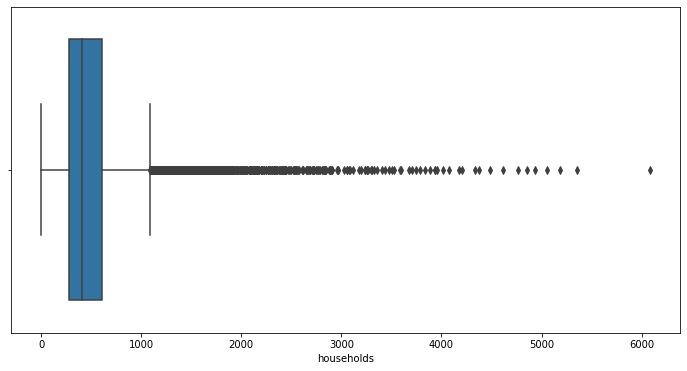

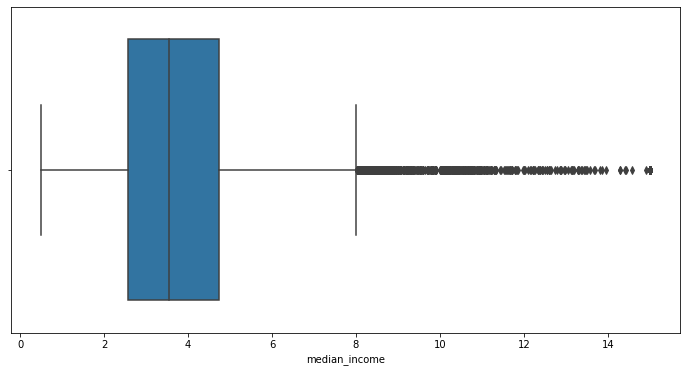

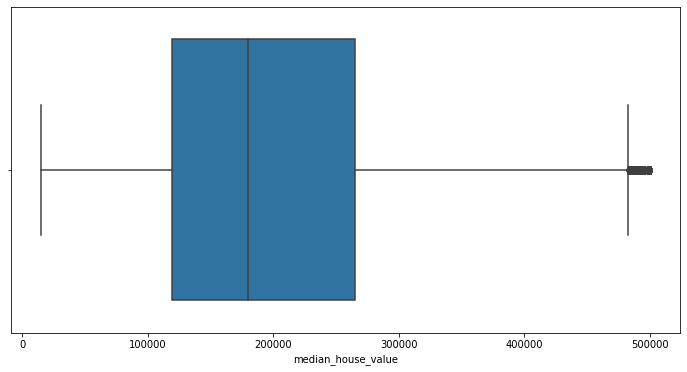

In [ ]:
for i in df.columns.to_list():
    if i != 'ocean_proximity':
        fig, ax = plt.subplots()
        fig.set_size_inches(12,6)
        sns.boxplot(x=i,data=df,ax=ax)

In [ ]:
def column_max_value(column):
    max_value = df[column].max()
    print(f'Max value in column \"{column}\" : {max_value}')
    print(f"Count of values equal to max value: {sum(df[column] == max_value)}")
    print(f"The procent of values equal to max value: {sum(df[column] == max_value)/ df.shape[0]}")


In [ ]:
column_max_value('median_house_value')

Max value in column "median_house_value" : 500001.0
Count of values equal to max value: 965
The procent of values equal to max value: 0.04675387596899225


In [ ]:
def getOutliers(dataframe,column):
    print(f"Column: {column}")
    sns.boxplot(x=column,data=dataframe,ax=ax)
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are {}".format(dataframe[column].size,len(data[column])))
    outlierRemoved = dataframe[~dataframe[column].isin(data[column])]
    return outlierRemoved

In [ ]:
df.describe().T

count           mean  ...           75%          max
longitude           20640.0    -119.569704  ...    -118.01000    -114.3100
latitude            20640.0      35.631861  ...      37.71000      41.9500
housing_median_age  20640.0      28.639486  ...      37.00000      52.0000
total_rooms         20640.0    2635.763081  ...    3148.00000   39320.0000
total_bedrooms      20433.0     537.870553  ...     647.00000    6445.0000
population          20640.0    1425.476744  ...    1725.00000   35682.0000
households          20640.0     499.539680  ...     605.00000    6082.0000
median_income       20640.0       3.870671  ...       4.74325      15.0001
median_house_value  20640.0  206855.816909  ...  264725.00000  500001.0000

[9 rows x 8 columns]

In [ ]:
df = getOutliers(df, 'median_house_value')

Column: median_house_value
(IQR = 145125.0)Outlier are anything outside this range: (-98087.5,482412.5)
Outliers out of total = 20640 are 1071


In [ ]:
df = getOutliers(df, 'housing_median_age')

Column: housing_median_age
(IQR = 19.0)Outlier are anything outside this range: (-10.5,65.5)
Outliers out of total = 19569 are 0


In [ ]:
df.describe().T

count           mean  ...          75%          max
longitude           19569.0    -119.562786  ...    -117.9900    -114.3100
latitude            19569.0      35.654159  ...      37.7300      41.9500
housing_median_age  19569.0      28.352752  ...      37.0000      52.0000
total_rooms         19569.0    2619.977260  ...    3123.0000   39320.0000
total_bedrooms      19369.0     539.893335  ...     648.0000    6445.0000
population          19569.0    1442.788952  ...    1749.0000   35682.0000
households          19569.0     501.394859  ...     606.0000    6082.0000
median_income       19569.0       3.665568  ...       4.5721      15.0001
median_house_value  19569.0  190852.301906  ...  246700.0000  482200.0000

[9 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa0ca1b10>,
      dtype=object)

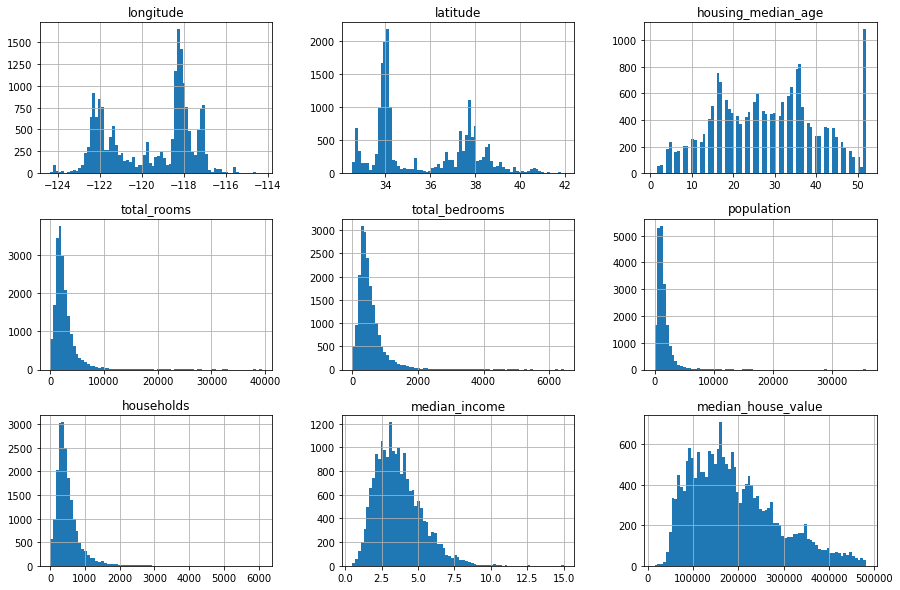

In [ ]:
df.hist(bins = 75, figsize=(15, 10))

In [ ]:
column_max_value('housing_median_age')

Max value in column "housing_median_age" : 52.0
Count of values equal to max value: 1080
The procent of values equal to max value: 0.055189330062854515


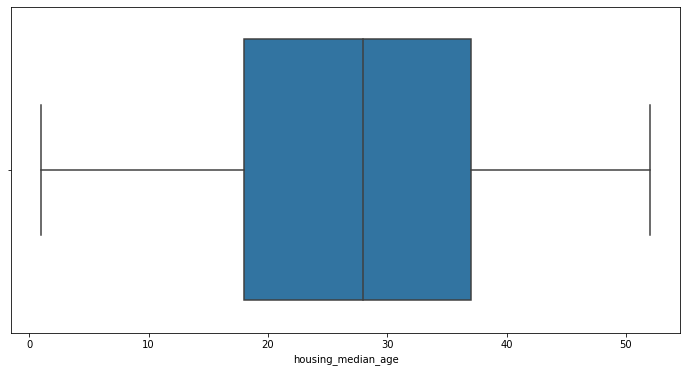

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x='housing_median_age', data=df, ax=ax)

In [ ]:
df = df[df['housing_median_age'] != df['housing_median_age'].max()]
df.describe().T


count           mean  ...          75%          max
longitude           18489.0    -119.486141  ...    -117.9700    -114.3100
latitude            18489.0      35.596680  ...      37.6700      41.9500
housing_median_age  18489.0      26.971442  ...      36.0000      51.0000
total_rooms         18489.0    2668.640327  ...    3184.0000   39320.0000
total_bedrooms      18296.0     548.166594  ...     659.0000    6445.0000
population          18489.0    1471.919520  ...    1782.0000   35682.0000
households          18489.0     508.862351  ...     614.0000    6082.0000
median_income       18489.0       3.682611  ...       4.6019      15.0001
median_house_value  18489.0  188249.559035  ...  241900.0000  482200.0000

[9 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa03f5650>,
      dtype=object)

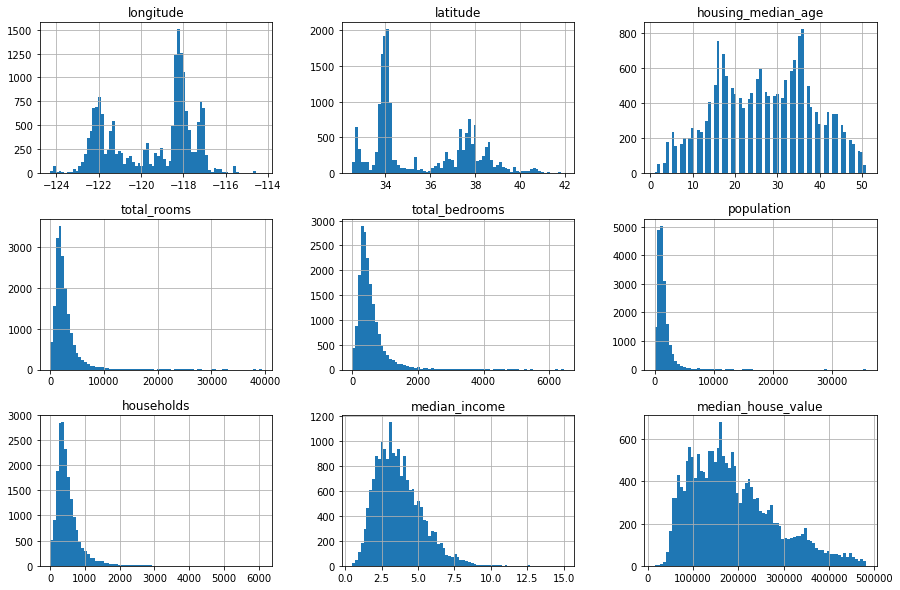

In [ ]:
df.hist(bins = 75, figsize=(15, 10))

## Missing values

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        193
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

(0.0, 3000.0)

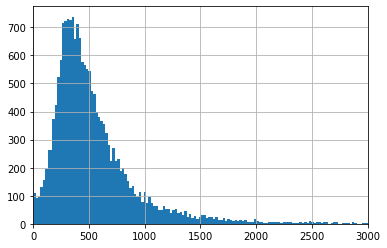

In [ ]:
df['total_bedrooms'].hist(bins = 300)
plt.xlim(0, 3000)

In [ ]:
df['total_bedrooms'].median()

442.0

In [ ]:
df['total_bedrooms'].mode()

0    280.0
dtype: float64

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace = True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Convert datatype

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8285
INLAND        6339
NEAR OCEAN    2305
NEAR BAY      1558
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
ocean_proximity_to_float64 = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df.replace({'ocean_proximity': ocean_proximity_to_float64}, inplace = True)
# df['ocean_proximity'] = pd.factorize(df['ocean_proximity'])[0]

## Remove noise

In [ ]:
df['count_rooms'] = df['total_rooms'] / df['households']
df['count_bedrooms'] = df['total_bedrooms'] / df['households']
df['people_pre_house'] = df['population'] / df['households']
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
df.head()

longitude  latitude  ...  count_bedrooms  people_pre_house
0     -122.23     37.88  ...        1.023810          2.555556
1     -122.22     37.86  ...        0.971880          2.109842
8     -122.26     37.84  ...        1.117647          2.026891
15    -122.26     37.85  ...        1.071970          2.640152
18    -122.26     37.84  ...        1.085919          2.362768

[5 rows x 9 columns]

In [ ]:
for col in df.columns.to_list():
    df = getOutliers(df, col)

Column: longitude
(IQR = 3.5799999999999983)Outlier are anything outside this range: (-126.91999999999999,-112.6)
Outliers out of total = 18489 are 0
Column: latitude
(IQR = 3.75)Outlier are anything outside this range: (28.295,43.295)
Outliers out of total = 18489 are 0
Column: housing_median_age
(IQR = 19.0)Outlier are anything outside this range: (-11.5,64.5)
Outliers out of total = 18489 are 0
Column: median_income
(IQR = 2.0666999999999995)Outlier are anything outside this range: (-0.5648499999999994,7.701949999999999)
Outliers out of total = 18489 are 312
Column: median_house_value
(IQR = 123900.0)Outlier are anything outside this range: (-71750.0,423850.0)
Outliers out of total = 18177 are 293
Column: ocean_proximity
(IQR = 1.0)Outlier are anything outside this range: (-0.5,3.5)
Outliers out of total = 17884 are 1
Column: count_rooms
(IQR = 1.5261591068954887)Outlier are anything outside this range: (2.1213785018379707,8.226014929419925)
Outliers out of total = 17883 are 387
Col

In [ ]:
df.head()

longitude  latitude  ...  count_bedrooms  people_pre_house
8     -122.26     37.84  ...        1.117647          2.026891
15    -122.26     37.85  ...        1.071970          2.640152
18    -122.26     37.84  ...        1.085919          2.362768
20    -122.27     37.85  ...        1.108434          2.463855
21    -122.27     37.85  ...        1.002732          2.538251

[5 rows x 9 columns]

# Graphics

Гістограма для кожної колонки

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f9f5add90>,
      dtype=object)

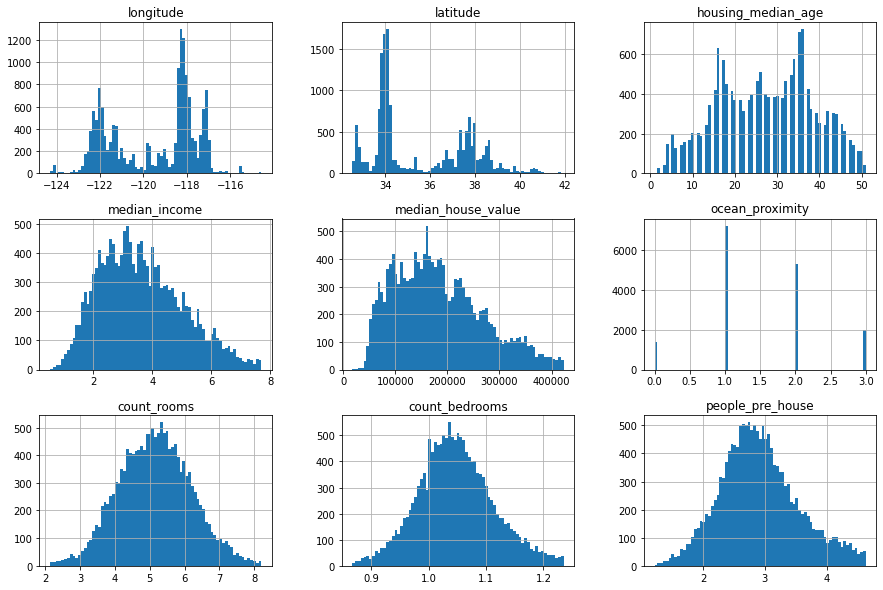

In [ ]:
df.hist(bins = 75, figsize=(15, 10))

Кореляція 

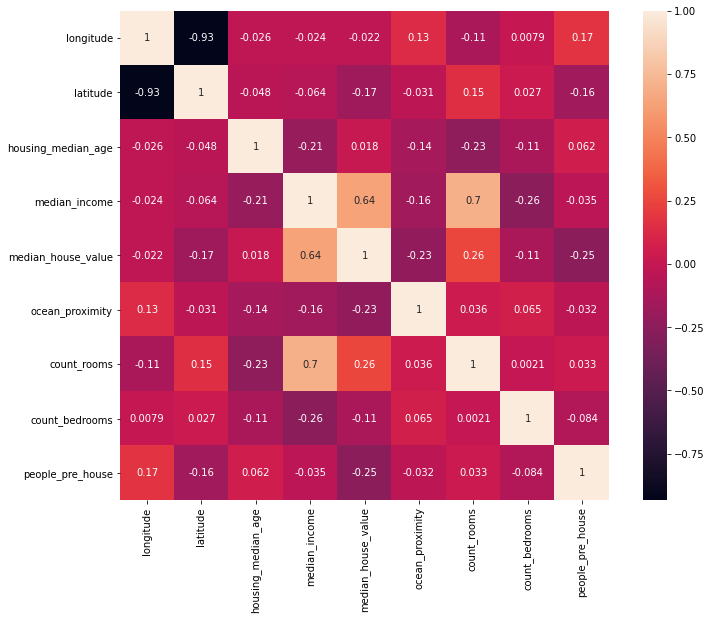

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


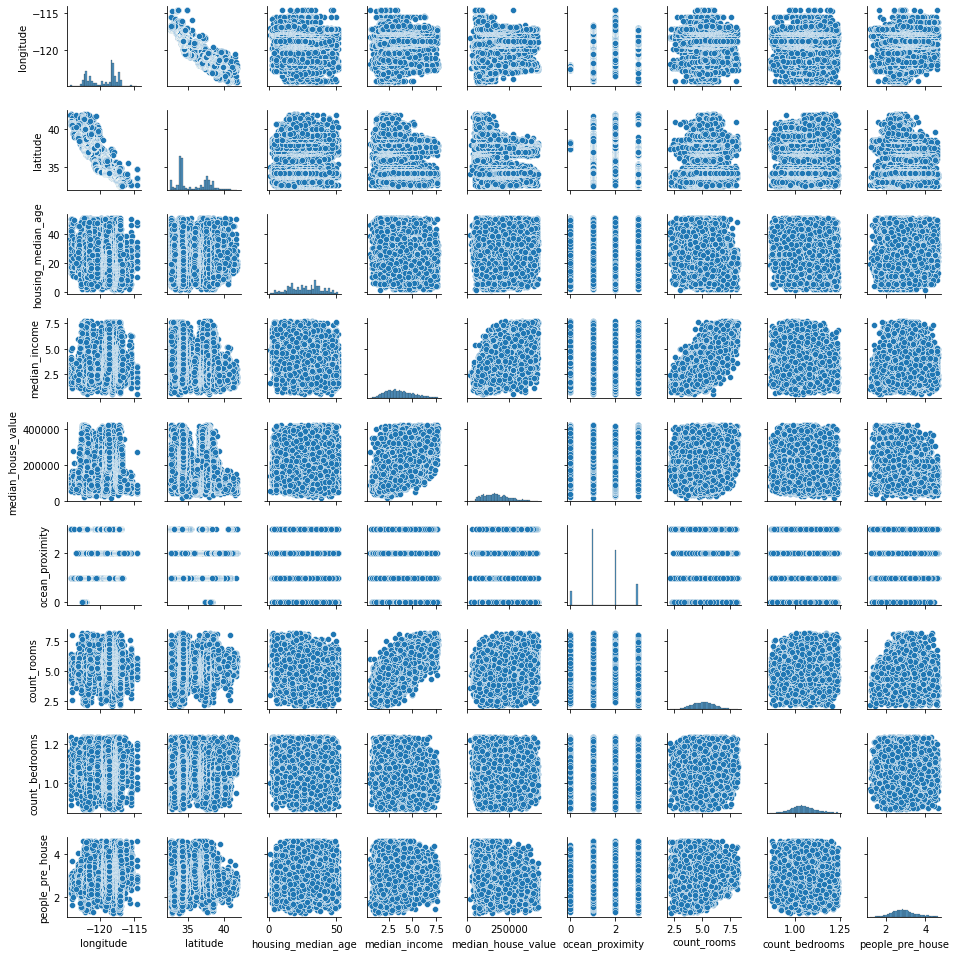

In [ ]:
sns.pairplot(df, size = 1.5)

Розподіл цін на будинок в залежності від його віку

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


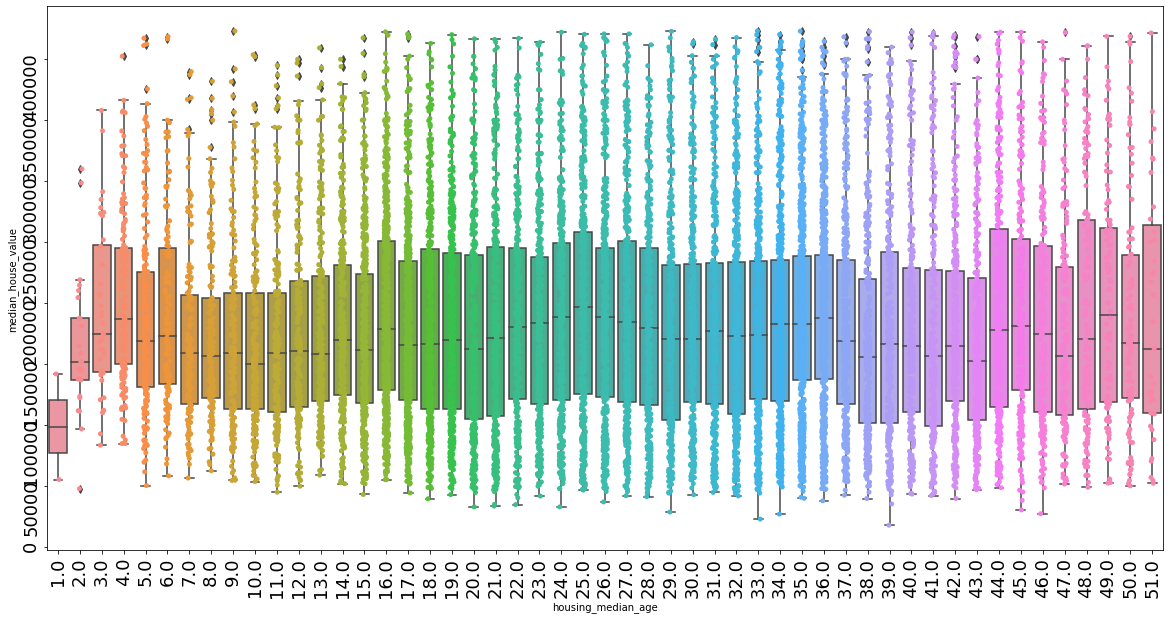

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot('housing_median_age', 'median_house_value', data=df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot('housing_median_age', 'median_house_value', data=df)

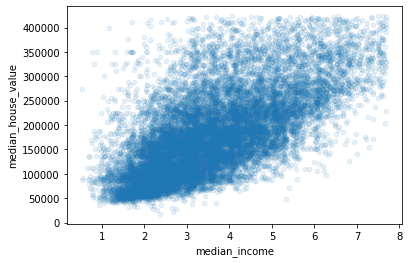

In [ ]:
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [ ]:
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
HeatMap(data, radius=10).add_to(map_hooray)
map_hooray

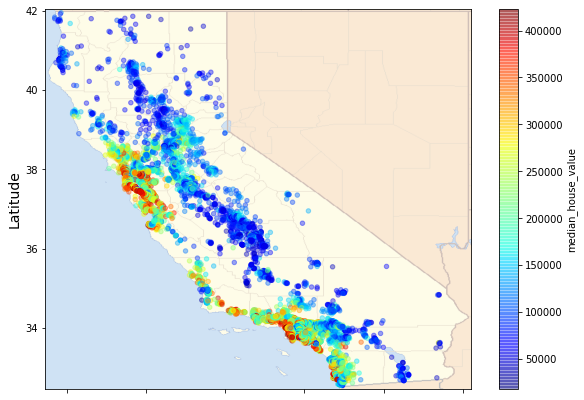

In [ ]:
import matplotlib

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

california_img = matplotlib.image.imread('california.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [ ]:
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642158
count_rooms           0.258291
housing_median_age    0.018055
longitude            -0.021948
count_bedrooms       -0.110764
latitude             -0.173898
ocean_proximity      -0.227082
people_pre_house     -0.247805
Name: median_house_value, dtype: float64

In [ ]:
df.describe().T

count           mean  ...            75%            max
longitude           15888.0    -119.512555  ...    -117.990000    -114.570000
latitude            15888.0      35.586220  ...      37.670000      41.950000
housing_median_age  15888.0      27.332389  ...      36.000000      51.000000
median_income       15888.0       3.636257  ...       4.568775       7.693300
median_house_value  15888.0  184357.181521  ...  238000.000000  423200.000000
ocean_proximity     15888.0       1.497419  ...       2.000000       3.000000
count_rooms         15888.0       5.149656  ...       5.850250       8.207672
count_bedrooms      15888.0       1.047547  ...       1.088365       1.235075
people_pre_house    15888.0       2.914417  ...       3.291228       4.633484

[9 rows x 8 columns]

In [ ]:
df.to_csv('processed_data.csv', index=False)

In [ ]:
df = pd.read_csv('processed_data.csv')
df.head()

longitude  latitude  ...  count_bedrooms  people_pre_house
0    -122.26     37.84  ...        1.117647          2.026891
1    -122.26     37.85  ...        1.071970          2.640152
2    -122.26     37.84  ...        1.085919          2.362768
3    -122.27     37.85  ...        1.108434          2.463855
4    -122.27     37.85  ...        1.002732          2.538251

[5 rows x 9 columns]

# Models

In [ ]:
save = False

In [ ]:
df_result = pd.DataFrame(columns = ['Name', 'MSE', "MAE"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
y = df['median_house_value']
X =  df.drop(['median_house_value'], axis = 1)

scaler = StandardScaler()
scaler.fit(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25, random_state = 32)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=32)

In [ ]:
X_train

longitude  latitude  ...  count_bedrooms  people_pre_house
13233    -120.44     34.96  ...        1.213823          3.492441
12254    -122.49     37.75  ...        1.039216          2.551471
6448     -118.34     33.98  ...        0.966912          3.533088
9910     -121.30     38.67  ...        1.044226          2.542998
13800    -121.96     37.25  ...        1.034582          2.276657
...          ...       ...  ...             ...               ...
13214    -120.43     34.98  ...        1.053279          3.004098
14139    -121.77     36.93  ...        0.969631          4.000000
6201     -118.18     33.83  ...        0.992754          2.141304
11485    -117.07     32.63  ...        1.062706          2.627063
14812    -122.95     38.73  ...        1.142857          3.006969

[8937 rows x 8 columns]

In [ ]:
# X_train = StandardScaler().fit_transform(X_train)
# X_valid =  StandardScaler().fit_transform(X_valid)
# X_test = StandardScaler().fit_transform(X_test)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
def add_result(name, mae, mse):
    res = {'Name': name, 'MAE': mae, 'MSE': mse}
    return df_result.append(res,ignore_index=True)

In [ ]:
def model_error(y_test, y_pred, train_loss_label = 'loss', test_loss_label = 'val_loss'):

    mse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    mae = mean_absolute_error(Y_test, y_pred)
    print(f"mean_squared_error: {mse}")
    print(f"mean_absolute_error: {mae}")

    y_pred = y_pred.flatten()

    test = pd.DataFrame({'Predicted':y_pred,'Actual':Y_test})

    fig= plt.figure(figsize=(16,8))
    test = test.reset_index()
    test = test.drop(['index'],axis=1)


    plt.plot(test[:50])
    plt.legend(['Actual','Predicted'])
    reg = sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
    regline = reg.ax_joint.get_lines()[0]
    regline.set_color('red')
    regline.set_zorder(5)
    plt.show()

    return mse, mae

In [ ]:
def show_loss(history, train_loss_label = 'loss', test_loss_label = 'val_loss'):
    
  training_loss = history.history[train_loss_label]
  test_loss = history.history[test_loss_label]

  epoch_count = range(1, len(training_loss) + 1)

  plt.plot(epoch_count, training_loss, 'g--')
  plt.plot(epoch_count, test_loss, 'r-')
  plt.legend(['Training Loss', 'Test Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

### Linear Regression

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)
y_pred = lreg.predict(X_test)

mean_squared_error: 50747.165749246036
mean_absolute_error: 38438.06291616947


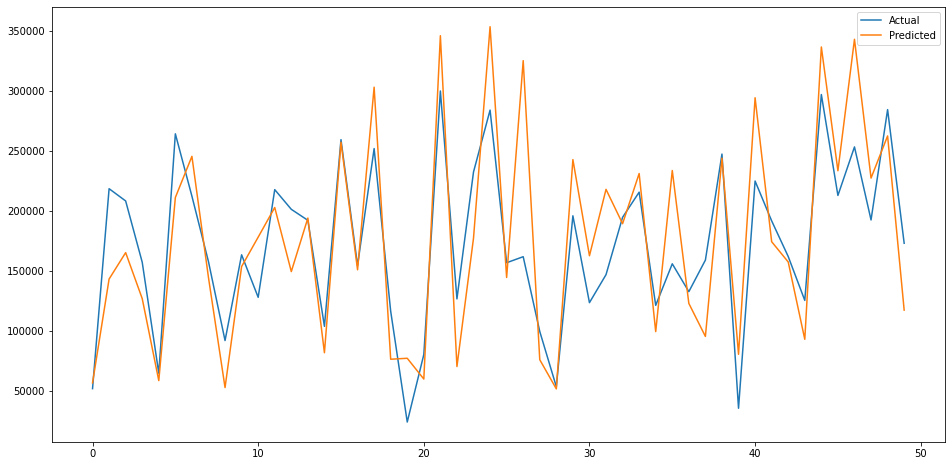

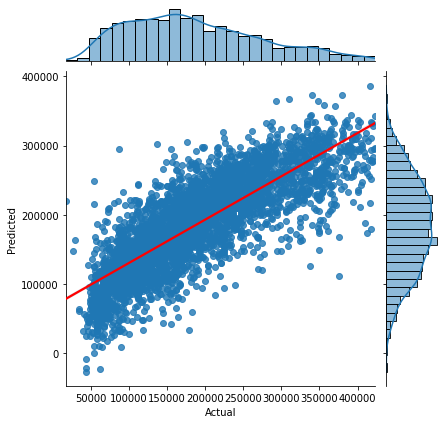

In [ ]:
mse, mae = model_error(Y_test, y_pred)

In [ ]:
df_result = add_result("Linear regression", mae, mse)
df_result

Name           MSE           MAE
0  Linear regression  50747.165749  38438.062916

## Tensorflow v1 (Sequential)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
saved_best_model_name = "model_sequential"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(saved_best_model_name, save_best_only=True)

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(X.shape[1], activation='relu', input_dim = X_train.shape[1]))

model.add(keras.layers.Dense(1024,kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(512,kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(256,kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(128,kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(64,kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(32,kernel_initializer='normal', activation='relu'))

model.add(keras.layers.Dense(1,kernel_initializer='normal', activation = 'relu'))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2

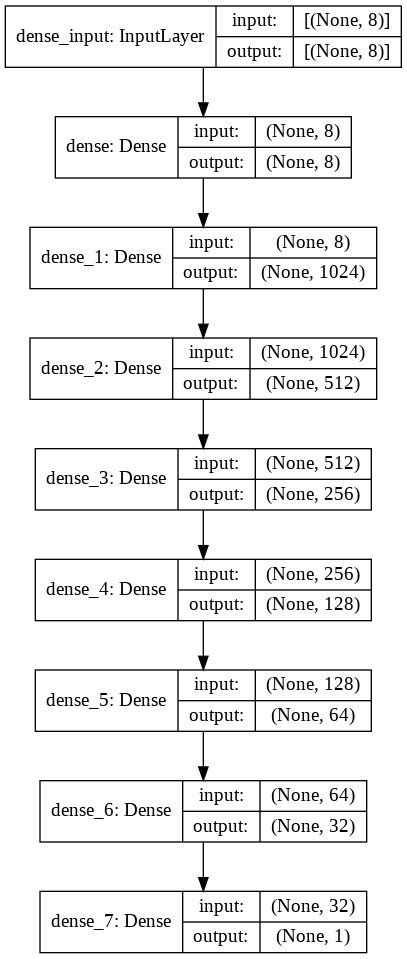

In [ ]:
keras.utils.plot_model(model, "tensorflow_v1_sequental_model.png", show_shapes=True)

In [ ]:
history = model.fit(X_train, Y_train,
                   epochs=100,
                   validation_data=(X_valid, Y_valid),
                   verbose=1,
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
280/280 [==============================] - 5s 15ms/step - loss: 25292064458.2491 - mse: 25292064458.2491 - mae: 129137.0661 - val_loss: 3624998400.0000 - val_mse: 3624998400.0000 - val_mae: 46241.7148
INFO:tensorflow:Assets written to: model_sequential/assets
Epoch 2/100
280/280 [==============================] - 4s 13ms/step - loss: 3346141641.3381 - mse: 3346141641.3381 - mae: 44948.3987 - val_loss: 2854558464.0000 - val_mse: 2854558464.0000 - val_mae: 40222.5977
INFO:tensorflow:Assets written to: model_sequential/assets
Epoch 3/100
280/280 [==============================] - 4s 14ms/step - loss: 2755239722.8185 - mse: 2755239722.8185 - mae: 39880.9267 - val_loss: 2731326720.0000 - val_mse: 2731326720.0000 - val_mae: 40051.1484
INFO:tensorflow:Assets written to: model_sequential/assets
Epoch 4/100
280/280 [==============================] - 4s 13ms/step - loss: 2499396494.1210 - mse: 2499396494.1210 - mae: 37776.4393 - val_loss: 2512083712.0000 - val_mse: 2512083712.0000 - 

In [ ]:
y_pred = model.predict(X_test)

mean_squared_error: 42400.84558434734
mean_absolute_error: 30157.334734744774


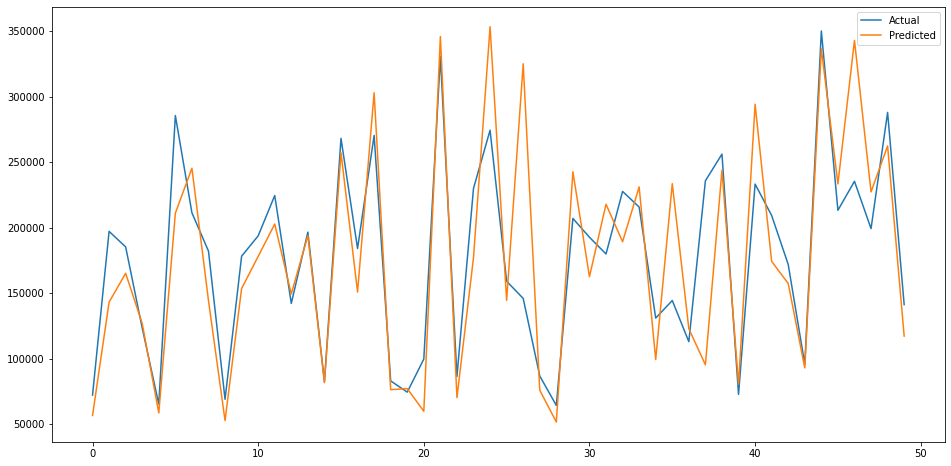

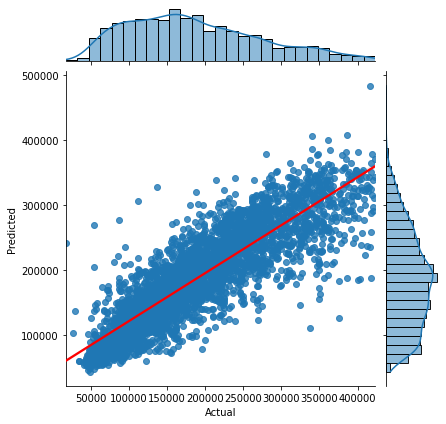

In [ ]:
mse, mae = model_error(Y_test, y_pred)

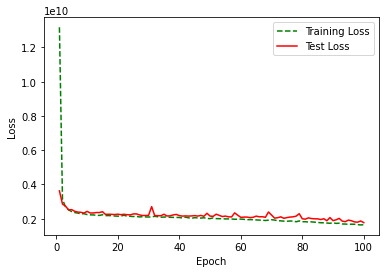

In [ ]:
show_loss(history)

In [ ]:
df_result = add_result("Tensorflow v1 (Sequential)", mae, mse)
df_result

Name           MSE           MAE
0           Linear regression  50747.165749  38438.062916
1  Tensorflow v1 (Sequential)  42400.845584  30157.334735

In [ ]:
if save:
    model.save('model_sequential.h5')

## Tensorflow v2 (deep, wide)

In [ ]:
saved_best_model_name = "model_deep_wide"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(saved_best_model_name, save_best_only=True)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(64,kernel_initializer='normal', activation='relu')(input_)
hidden2 = keras.layers.Dense(64,kernel_initializer='normal', activation='relu')(hidden1)
hidden3 = keras.layers.Dense(64,kernel_initializer='normal', activation='relu')(hidden2)
hidden4 = keras.layers.Dense(64,kernel_initializer='normal', activation='relu')(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

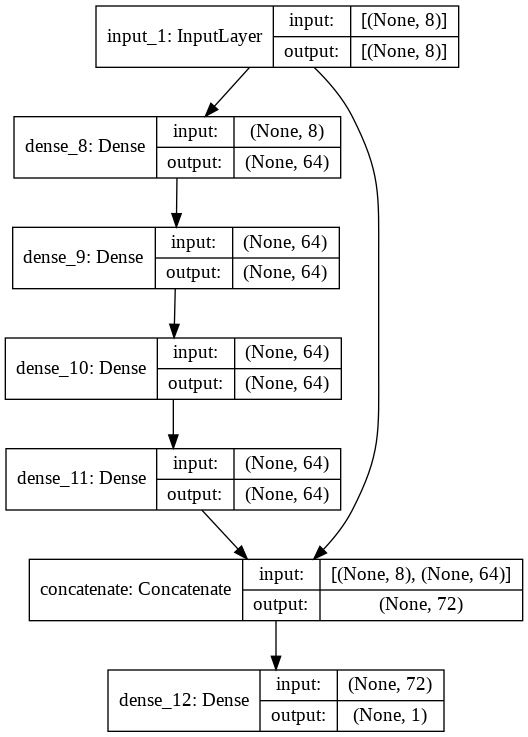

In [ ]:
keras.utils.plot_model(model, "tensorflow_v2_deep_wide_model.png", show_shapes=True)

In [ ]:
model.compile(loss="mean_squared_error", optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, 
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
y_pred = model.predict(X_test)

Epoch 1/100
280/280 [==============================] - 2s 5ms/step - loss: 37023744204.0712 - val_loss: 4185868288.0000
INFO:tensorflow:Assets written to: model_deep_wide/assets
Epoch 2/100
280/280 [==============================] - 0s 2ms/step - loss: 3785697289.1103 - val_loss: 3174084864.0000
INFO:tensorflow:Assets written to: model_deep_wide/assets
Epoch 3/100
280/280 [==============================] - 0s 2ms/step - loss: 2975892157.4947 - val_loss: 2829413632.0000
INFO:tensorflow:Assets written to: model_deep_wide/assets
Epoch 4/100
280/280 [==============================] - 0s 2ms/step - loss: 2628624204.5267 - val_loss: 2626363136.0000
INFO:tensorflow:Assets written to: model_deep_wide/assets
Epoch 5/100
280/280 [==============================] - 0s 2ms/step - loss: 2518892340.8399 - val_loss: 2525679616.0000
INFO:tensorflow:Assets written to: model_deep_wide/assets
Epoch 6/100
280/280 [==============================] - 0s 2ms/step - loss: 2465473895.8577 - val_loss: 2475275264.

mean_squared_error: 46119.62773664922
mean_absolute_error: 33195.127357321566


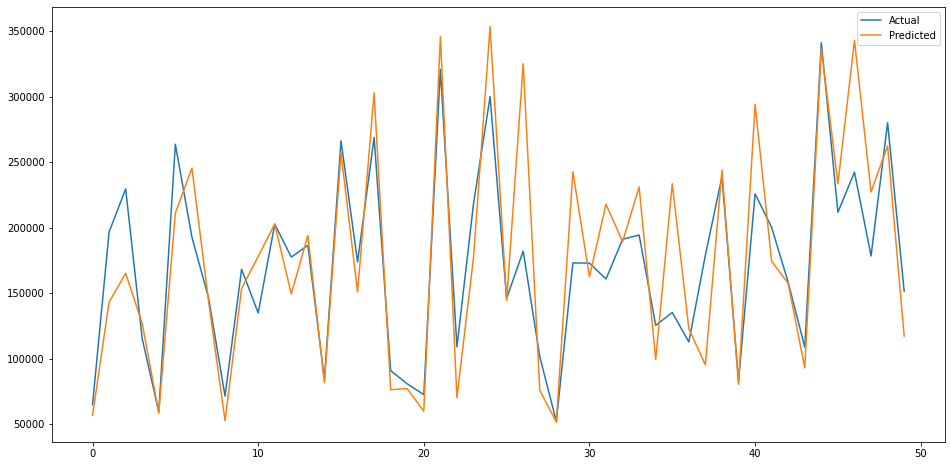

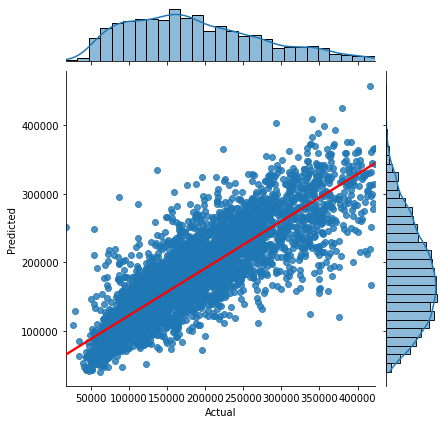

In [ ]:
mse, mae = model_error(Y_test, y_pred)

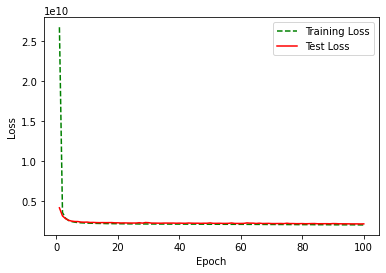

In [ ]:
show_loss(history)

In [ ]:
df_result = add_result("Tensorflow v2 (deep, wide)", mae, mse)
df_result

Name           MSE           MAE
0           Linear regression  50747.165749  38438.062916
1  Tensorflow v1 (Sequential)  42400.845584  30157.334735
2  Tensorflow v2 (deep, wide)  46119.627737  33195.127357

In [ ]:
if save:
    model.save('model_deep_wide.h5')

## Tensorflow v3 (2 inputs)

In [ ]:
saved_best_model_name = "model_2inputs"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(saved_best_model_name, save_best_only=True)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[3], name="deep_input")

hidden1 = keras.layers.Dense(128, activation="relu")(input_B)
hidden2 = keras.layers.Dense(128,kernel_initializer='normal', activation='relu')(hidden1)
hidden3 = keras.layers.Dense(64,kernel_initializer='normal', activation='relu')(hidden2)
hidden4 = keras.layers.Dense(32,kernel_initializer='normal', activation='relu')(hidden3)

concat = keras.layers.concatenate([input_A, hidden4])

output = keras.layers.Dense(1, name="output")(concat)


model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

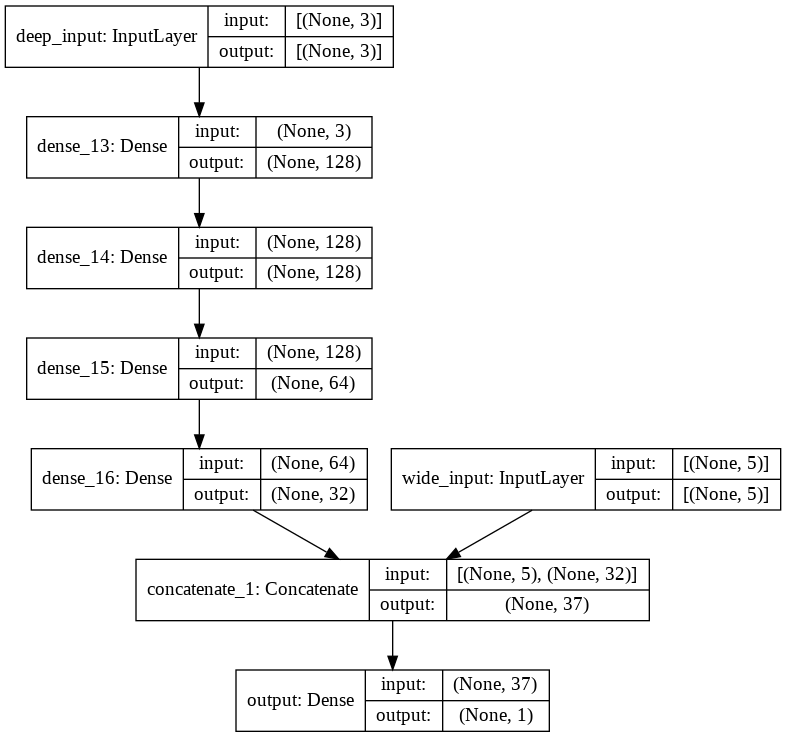

In [ ]:
keras.utils.plot_model(model, "tensorflow_v3_2inputs_model.png", show_shapes=True)

In [ ]:
model.compile(loss="mse", loss_weights = [0.7, 0.3], optimizer='adam')

In [ ]:
X_train_A, X_train_B = X_train[:, [3, 5, 2]], X_train[:, [0, 1, 4, 6, 7]]
X_valid_A, X_valid_B = X_valid[:, [3, 5, 2]], X_valid[:, [0, 1, 4, 6, 7]]
X_test_A, X_test_B = X_test[:, [3, 5, 2]], X_test[:, [0, 1, 4, 6, 7]]

In [ ]:
# history = model.fit((X_train_A, X_train_B), Y_train, epochs=30, validation_data=((X_valid_A, X_valid_B), Y_valid))
history = model.fit((X_train_B, X_train_A), Y_train, 
                    epochs=100, 
                    validation_data=((X_valid_B, X_valid_A), Y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
280/280 [==============================] - 1s 2ms/step - loss: 26096819393.1388 - val_loss: 3964895744.0000
INFO:tensorflow:Assets written to: model_2inputs/assets
Epoch 2/100
280/280 [==============================] - 1s 2ms/step - loss: 3470197287.1744 - val_loss: 2691094016.0000
INFO:tensorflow:Assets written to: model_2inputs/assets
Epoch 3/100
280/280 [==============================] - 1s 2ms/step - loss: 2573255158.4342 - val_loss: 2536580864.0000
INFO:tensorflow:Assets written to: model_2inputs/assets
Epoch 4/100
280/280 [==============================] - 1s 2ms/step - loss: 2399592783.2598 - val_loss: 2507726848.0000
INFO:tensorflow:Assets written to: model_2inputs/assets
Epoch 5/100
280/280 [==============================] - 1s 2ms/step - loss: 2381338721.4804 - val_loss: 2486066944.0000
INFO:tensorflow:Assets written to: model_2inputs/assets
Epoch 6/100
280/280 [==============================] - 1s 2ms/step - loss: 2390225658.5338 - val_loss: 2495673088.0000
Epoch

mean_squared_error: 59908.69982421302
mean_absolute_error: 45918.58646167705


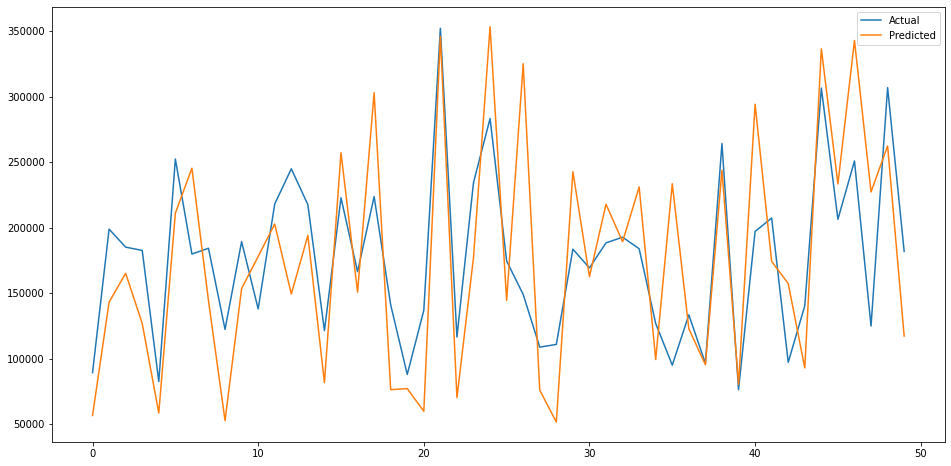

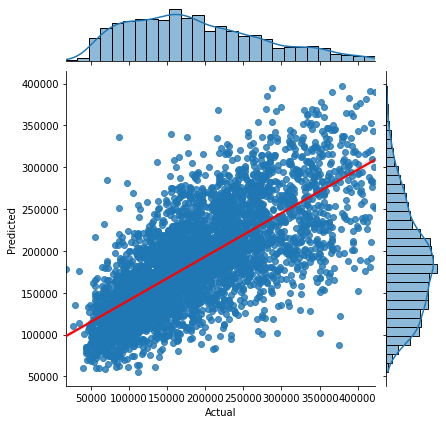

In [ ]:
y_pred = model.predict((X_test_B, X_test_A))
mse, mae = model_error(Y_test, y_pred)

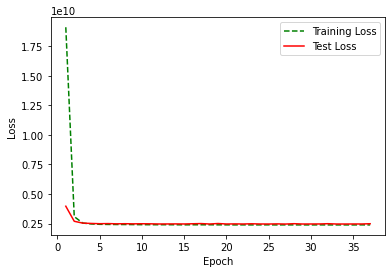

In [ ]:
show_loss(history)

In [ ]:
df_result = add_result("Tensorflow v3 (2 inputs)", mae, mse)
df_result

Name           MSE           MAE
0           Linear regression  50747.165749  38438.062916
1  Tensorflow v1 (Sequential)  42400.845584  30157.334735
2  Tensorflow v2 (deep, wide)  46119.627737  33195.127357
3    Tensorflow v3 (2 inputs)  59908.699824  45918.586462

In [ ]:
if save:
    model.save('model_2inputs.h5')

In [ ]:

# Name	MSE	MAE
# 0	Linear regression	50786.858884	38403.747437
# 1	Tensorflow v1 (Sequential)	46003.280063	33721.058401
# 2	Tensorflow v2 (deep, wide)	47058.229864	34205.581535
# 3	Tensorflow v3 (2 inputs)	60436.397615	45361.247264

## Tesorflow v4 (2 outputs)

In [ ]:
saved_best_model_name = "model_2outputs"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(saved_best_model_name, save_best_only=True)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[3], name="deep_input")

hidden1 = keras.layers.Dense(64, activation="relu")(input_B)
hidden2 = keras.layers.Dense(64, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(32, activation="relu")(hidden2)

concat = keras.layers.concatenate([input_A, hidden3])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden3)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])


In [ ]:
model.compile(loss="mse", optimizer='adam')

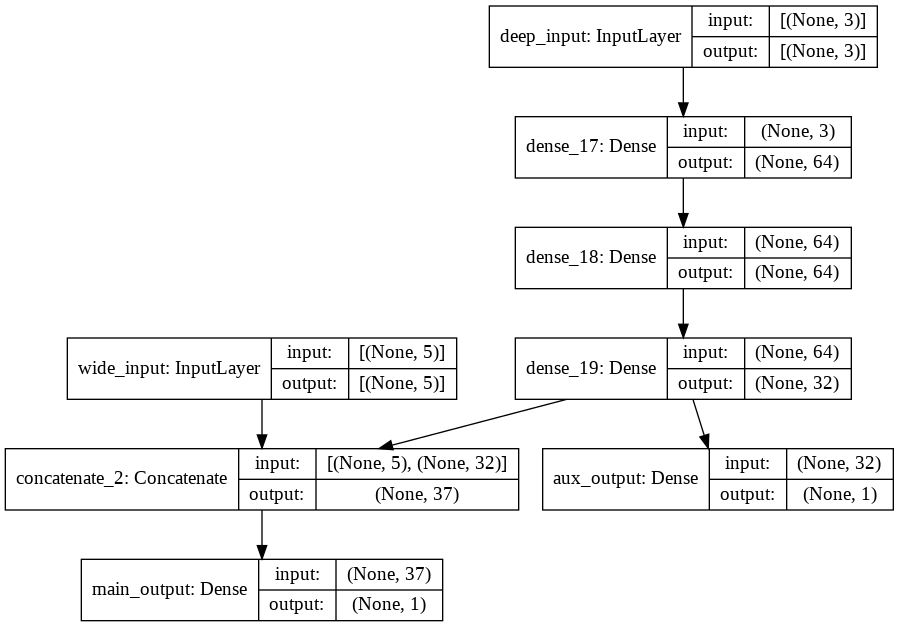

In [ ]:
keras.utils.plot_model(model, "tensorflow_v4_2outputs_model.png", show_shapes=True)

In [ ]:

X_train_A, X_train_B = X_train[:, [3, 5, 2]], X_train[:, [0, 1, 4, 6, 7]]
X_valid_A, X_valid_B = X_valid[:, [3, 5, 2]], X_valid[:, [0, 1, 4, 6, 7]]
X_test_A, X_test_B = X_test[:, [3, 5, 2]], X_test[:, [0, 1, 4, 6, 7]]


X_train_A, X_train_B = X_train_B, X_train_A
X_valid_A, X_valid_B = X_valid_B, X_valid_A

In [ ]:
history = model.fit(x = [X_train_A, X_train_B], y = [Y_train, Y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [Y_valid, Y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
280/280 [==============================] - 1s 3ms/step - loss: 80901354565.2384 - main_output_loss: 40463337173.1815 - aux_output_loss: 40438041968.0569 - val_loss: 78094491648.0000 - val_main_output_loss: 39292952576.0000 - val_aux_output_loss: 38801543168.0000
INFO:tensorflow:Assets written to: model_2outputs/assets
Epoch 2/100
280/280 [==============================] - 0s 2ms/step - loss: 64925176172.4128 - main_output_loss: 32919199328.5694 - aux_output_loss: 32005976647.0605 - val_loss: 22052931584.0000 - val_main_output_loss: 11705796608.0000 - val_aux_output_loss: 10347132928.0000
INFO:tensorflow:Assets written to: model_2outputs/assets
Epoch 3/100
280/280 [==============================] - 0s 2ms/step - loss: 15568197792.3416 - main_output_loss: 8164086155.3879 - aux_output_loss: 7404114237.0391 - val_loss: 10353448960.0000 - val_main_output_loss: 5207265280.0000 - val_aux_output_loss: 5146185728.0000
INFO:tensorflow:Assets written to: model_2outputs/assets
Epoch 4/

In [ ]:
y_pred = model.predict((X_test_B, X_test_A))

mean_squared_error: 59889.670404064884
mean_absolute_error: 45796.08362738387


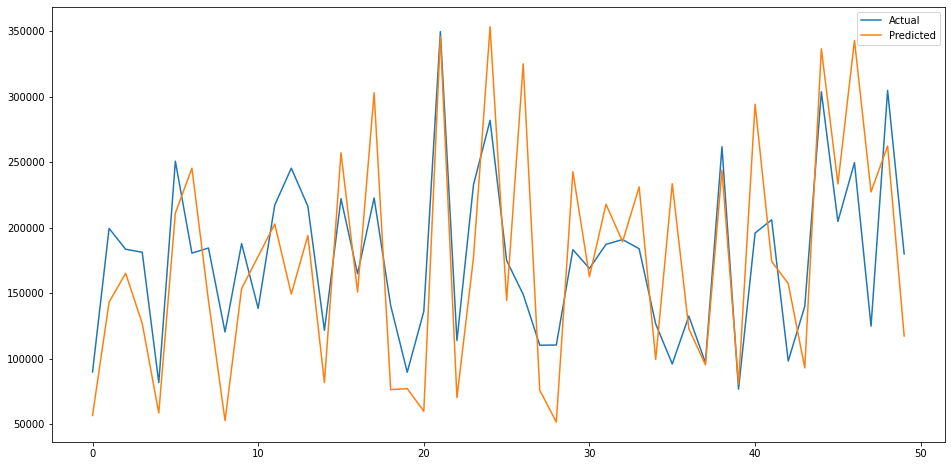

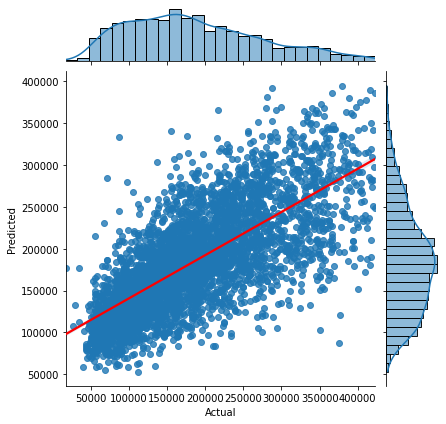

In [ ]:
mse0, mae0 = model_error(Y_test, y_pred[0])

mean_squared_error: 59897.77163370927
mean_absolute_error: 45802.92366192252


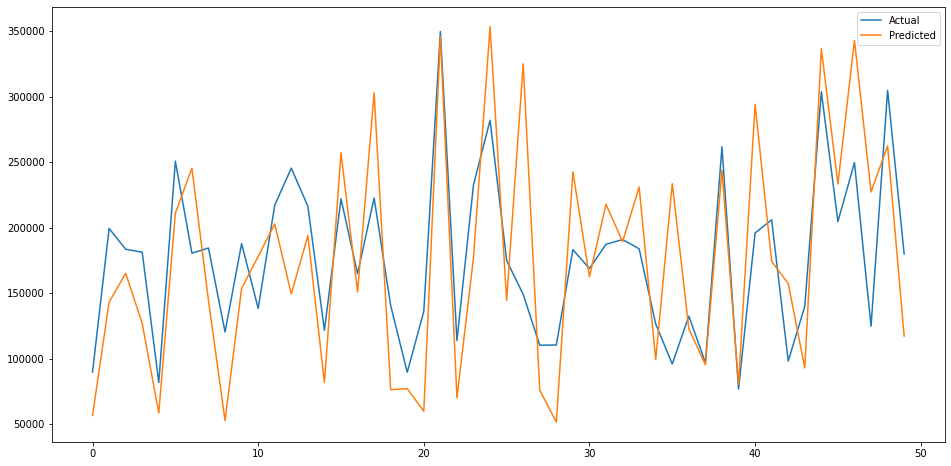

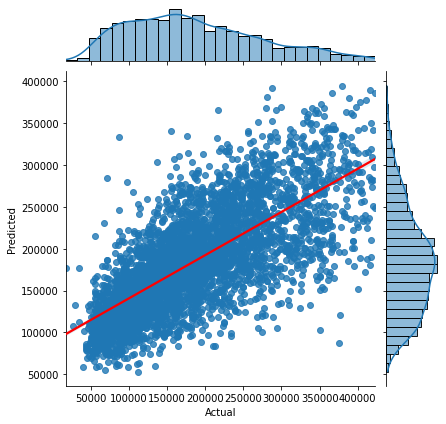

In [ ]:
mse1, mae1 = model_error(Y_test, y_pred[1])

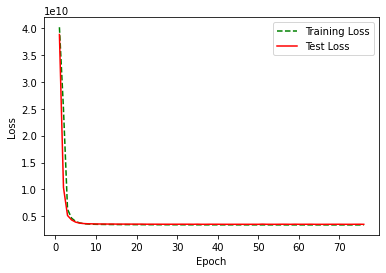

In [ ]:
show_loss(history, train_loss_label='aux_output_loss', test_loss_label='val_aux_output_loss')

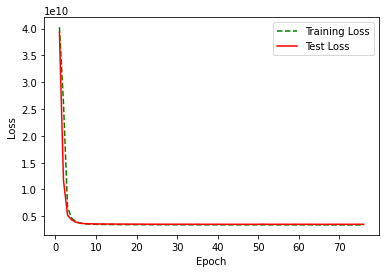

In [ ]:
show_loss(history, train_loss_label='main_output_loss', test_loss_label='val_main_output_loss')


In [ ]:
df_result = add_result("Tensorflow v4 (2 outputs)", mae0, mse0)

In [ ]:
df_result

Name           MSE           MAE
0           Linear regression  50747.165749  38438.062916
1  Tensorflow v1 (Sequential)  42400.845584  30157.334735
2  Tensorflow v2 (deep, wide)  46119.627737  33195.127357
3    Tensorflow v3 (2 inputs)  59908.699824  45918.586462
4   Tensorflow v4 (2 outputs)  59889.670404  45796.083627

In [ ]:
if save:
    model.save('model_2outputs.h5')

In [ ]:
# Name	MSE	MAE
# 0	Linear regression	55247.964884	40644.075776
# 1	Tensorflow v1 (Sequential)	48170.347743	35884.776418
# 2	Tensorflow v2 (deep, wide)	47941.541221	35404.545789
# 3	Tensorflow v3 (2 inputs)	69709.238092	54063.063394
# 4	Tensorflow v4 (2 outputs)	59849.766275	45615.584009

In [ ]:
# Callback
# Name	MSE	MAE
# 0	Linear regression	50747.165749	38438.062916
# 1	Tensorflow v1 (Sequential)	43351.660535	31395.778978
# 2	Tensorflow v2 (deep, wide)	46518.074910	33818.329343
# 3	Tensorflow v3 (2 inputs)	59898.507704	45870.632594
# 4	Tensorflow v4 (2 outputs)	59995.008327	45869.190203

In [ ]:
df_result.drop(index = 0, inplace=True)

In [ ]:
df_result.to_csv("models_error.csv")